In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer

%matplotlib inline

In [2]:
cancer = load_breast_cancer()
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = pd.DataFrame(cancer.target, columns=["TARGET"])

data = pd.concat([features, target], axis=1)

In [4]:
a = data.corr('pearson')
abs(a.loc['TARGET']).sort_values(ascending=False)

TARGET                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

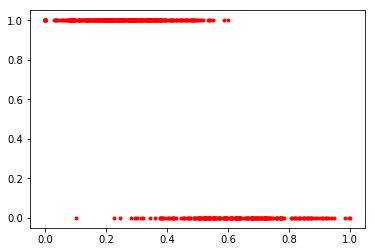

In [5]:
x = np.array(data['worst concave points'])
y = np.array(data['TARGET'])

x = (x - x.min())/(x.max() - x.min())

plt.plot(x, y, 'r.')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [7]:
def hypothesis(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def error(a, b, x ,y):
    e = 0
    m = len(x)
    for i in range(m):
        z = a*x[i] + b
        e += y[i]*np.log(hypothesis(z)) + (1-y[i])*np.log(1-hypothesis(z))
    
    return (-1/m) * e

In [9]:
def step_gradient(a, b, x, y, learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        z = a*x[i] + b
        grad_a += 1/m * (hypothesis(z) - y[i]) * x[i]
        grad_b += 1/m * (hypothesis(z) - y[i]) 
    
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    return a, b

In [10]:
def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    for i in range(iterations):
        e = error(a, b, x, y)
        if i % 1000 == 0:
            print(f'Error:{e}, a:{a}, b: {b}')
        
        a, b = step_gradient(a, b, x, y, learning_rate)
    return a, b

In [11]:
a = 0
b = 0
learning_rate = 0.1
iterations = 10000

final_a, final_b = descend(a, b, x_train, y_train, learning_rate, iterations)

Error:0.6931471805599468, a:0, b: 0
Error:0.37083138057174814, a:-4.776258460000776, b: 2.4059008271246287
Error:0.29871581627995675, a:-7.217568549752917, b: 3.4540544352623597
Error:0.2681895722184331, a:-8.81487372352722, b: 4.140578092515137
Error:0.251651000239254, a:-9.992885202662885, b: 4.647226063824298
Error:0.24144665328930004, a:-10.918983575557696, b: 5.045829404161909
Error:0.23462702778252145, a:-11.676371976197817, b: 5.372072563267224
Error:0.22981679484669543, a:-12.312592839239514, b: 5.646331593913749
Error:0.22628954677154786, a:-12.85745267382705, b: 5.88137587543982
Error:0.22362631736931332, a:-13.330918641476405, b: 6.085758280972611


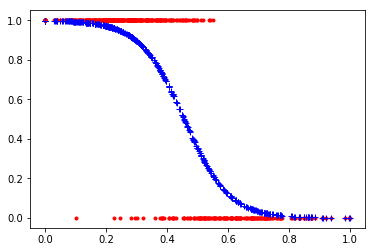

In [12]:
f = final_a * x_train + final_b
plt.plot(x_train, y_train, 'r.', x_train, hypothesis(f), 'b+')

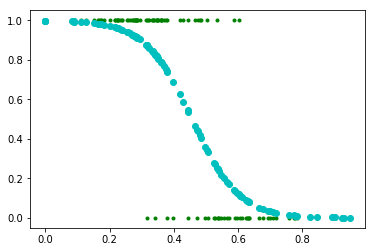

In [13]:
g = final_a * x_test + final_b

plt.plot(x_test, y_test, 'g.', x_test, hypothesis(g), 'co')

In [14]:
def accuracy(theta, a, b, x, y):
    count = 0
    for j in range(len(x)):
        test = hypothesis(theta)

        if test[j] > 0.9:
            z = 1
        else:
            z = 0
        if y[j] == z:
            count += 1
    
    acc = count/len(y)
#     print(count)
    
    print(f"Error is {100-(acc*100)} %")

In [15]:
accuracy(f, final_a, final_b, x_train, y_train)
accuracy(g, final_a, final_b, x_test, y_test)

Error is 20.659340659340657 %
Error is 27.192982456140342 %
